## Imports

Import required libraries for data processing, visualization, and analysis.


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pyarrow as pa

### Load Raw Datasets
Reading CSV files from the raw data directory.

In [2]:
aisles=pd.read_csv("../data/raw/aisles.csv")
departments=pd.read_csv("../data/raw/departments.csv")
order_prior=pd.read_csv("../data/raw/order_products__prior.csv")
order_train=pd.read_csv("../data/raw/order_products__train.csv")
orders=pd.read_csv("../data/raw/orders.csv")
products=pd.read_csv("../data/raw/products.csv")

###  Data Preview
Displaying the first 5 rows of each dataframe to understand the schema.

In [3]:
print("Aisles\n",'-'*70)
display(aisles.head())

print('Departments\n','-'*70)
display(departments.head())

print('Order Products Prior\n','-'*70)
display(order_prior.head())

print('Order Product Train\n','-'*70)
display(order_train.head())

print('Orders\n','-'*70)
display(orders.head())

print('Products\n','-'*70)
display(products.head())


Aisles
 ----------------------------------------------------------------------


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


Departments
 ----------------------------------------------------------------------


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Order Products Prior
 ----------------------------------------------------------------------


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


Order Product Train
 ----------------------------------------------------------------------


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


Orders
 ----------------------------------------------------------------------


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


Products
 ----------------------------------------------------------------------


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


## Data Quality and Memory Optimization
Check data structure, reduce memory usage, inspect missing values, and summary statistics for the most important datasets.


In [4]:
print('Order Products Prior (Info) \n','-'*70)
order_prior.info(show_counts=True)
print('\n')
print('Order Product Train (Info)\n','-'*70)
order_train.info(show_counts=True)
print('\n')
print("Orders (Info)\n",'-'*70)
orders.info(show_counts=True)

Order Products Prior (Info) 
 ----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Non-Null Count     Dtype
---  ------             --------------     -----
 0   order_id           32434489 non-null  int64
 1   product_id         32434489 non-null  int64
 2   add_to_cart_order  32434489 non-null  int64
 3   reordered          32434489 non-null  int64
dtypes: int64(4)
memory usage: 989.8 MB


Order Product Train (Info)
 ----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int6

In [5]:
def optimize_memory(df):
    for col in df.columns:
        if df[col].dtype=='int64':
            df[col]=df[col].astype('int32')
        elif df[col].dtype=='float64':
            df[col]=df[col].astype('float32')    
    return df 

orders=optimize_memory(orders)
order_prior=optimize_memory(order_prior)
order_train=optimize_memory(order_train)        

In [6]:
print('Missing Value in Order Products Prior\n','-'*70)
display(order_prior.isna().sum())

print('Missing Value in Order Product Train\n','-'*70)
display(order_train.isna().sum())

print("Missing Value in Orders\n",'-'*70)
display(orders.isna().sum())

Missing Value in Order Products Prior
 ----------------------------------------------------------------------


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Missing Value in Order Product Train
 ----------------------------------------------------------------------


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Missing Value in Orders
 ----------------------------------------------------------------------


order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

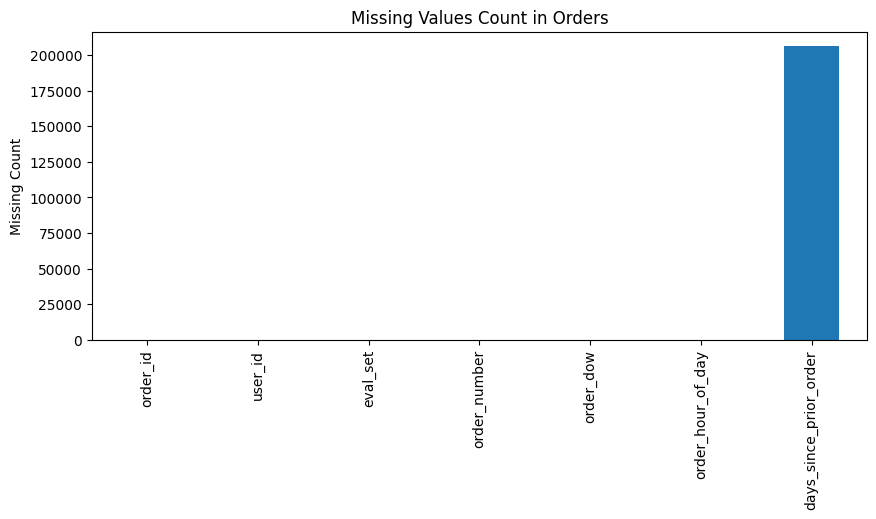

In [7]:
orders.isna().sum().plot(kind='bar', figsize=(10,4))
plt.ylabel('Missing Count')
plt.title('Missing Values Count in Orders')
plt.show()


In [8]:
orders.loc[orders['days_since_prior_order'].isna(),'order_number'].value_counts()

order_number
1    206209
Name: count, dtype: int64

Missing values in `days_since_prior_order` occur only for first-time orders so we imputed it with 0 as a sentinel value, indicating no prior purchase history.

In [9]:
orders['days_since_prior_order']=orders['days_since_prior_order'].fillna(0)
orders.isna().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [10]:
display(orders.describe().round(2))

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3421083.00,3421083.00,3421083.00,3421083.00,3421083.00,3421083.00
mean,1710542.00,102978.21,17.15,2.78,13.45,10.44
std,987581.74,59533.72,17.73,2.05,4.23,9.31
min,1.00,1.00,1.00,0.00,0.00,0.00
25%,855271.50,51394.00,5.00,1.00,10.00,4.00
50%,1710542.00,102689.00,11.00,3.00,13.00,7.00
75%,2565812.50,154385.00,23.00,5.00,16.00,15.00
max,3421083.00,206209.00,100.00,6.00,23.00,30.00


## Dataset Merging
Combine related tables to build unified prior and train datasets for the analysis.

In [11]:
full_products=products.merge(aisles,on='aisle_id',how='left').merge(departments,on='department_id',how='left')
full_products.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [12]:
full_priors=order_prior.merge(orders,on='order_id',how='left').merge(full_products,on='product_id',how='left')
full_priors.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [13]:
full_train=order_train.merge(orders,on='order_id',how='left').merge(full_products,on='product_id',how='left')
full_train.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods


## Exploratory Data Analysis (EDA)
Analyze numerical and categorical features to understand ordering behavior and data patterns.


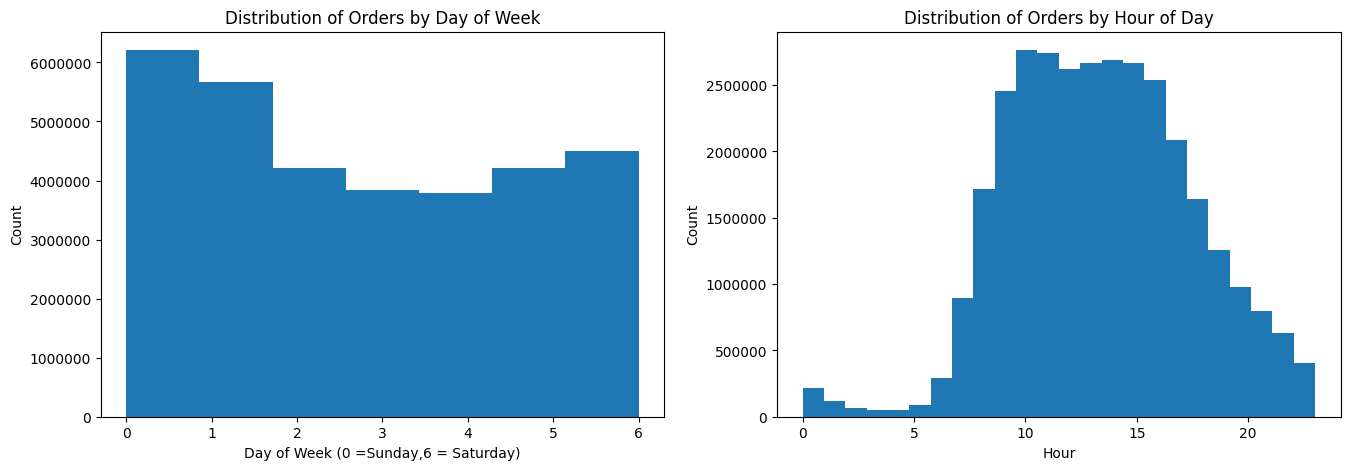

In [14]:
fig,axes=plt.subplots(1,2,figsize=(16,5))

axes[0].hist(full_priors['order_dow'],bins=7)
axes[0].set_title('Distribution of Orders by Day of Week')
axes[0].set_xlabel('Day of Week (0 =Sunday,6 = Saturday)')
axes[0].set_ylabel('Count')
axes[0].ticklabel_format(style='plain')

axes[1].hist(full_priors['order_hour_of_day'],bins=24)
axes[1].set_title('Distribution of Orders by Hour of Day')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Count')
axes[1].ticklabel_format(style='plain')

add-to-cart order is heavily right-skewed, indicating that most items are added early in the shopping cart
and Days since prior order shows a capped distribution at 30 days

Text(18.0, 3400000, 'Max value = 30 (capped)')

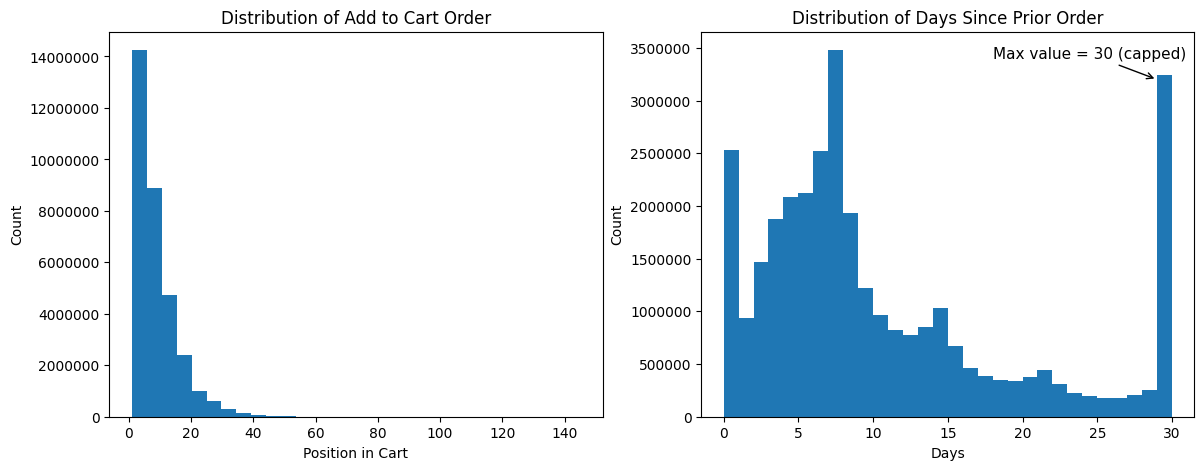

In [15]:
fig,axes=plt.subplots(1,2,figsize=(14,5))

axes[0].hist(full_priors['add_to_cart_order'],bins=30)
axes[0].set_title('Distribution of Add to Cart Order')
axes[0].set_xlabel('Position in Cart')
axes[0].set_ylabel('Count')
axes[0].ticklabel_format(style='plain')

max_val=full_priors['days_since_prior_order'].max()
axes[1].hist(full_priors['days_since_prior_order'],bins=30)
axes[1].set_title('Distribution of Days Since Prior Order')
axes[1].set_xlabel('Days')
axes[1].set_ylabel('Count')
axes[1].ticklabel_format(style='plain')
axes[1].annotate(f'Max value = {int(max_val)} (capped)',
                 xy=(max_val-1, 3200000),fontsize=11,
                 xytext=(max_val-12, 3400000),
                 arrowprops=dict(arrowstyle='->'))



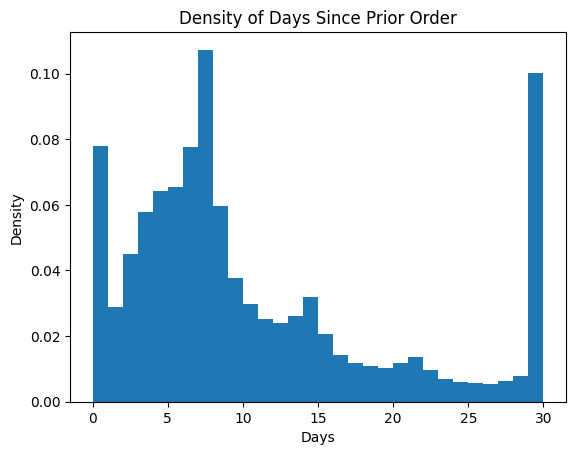

In [16]:
plt.hist(full_priors['days_since_prior_order'],bins=30,density=True)
plt.title('Density of Days Since Prior Order')
plt.xlabel('Days')
plt.ylabel('Density')
plt.show()


## Caps Outliers Using The IQR Method (Winsorizing).

In [17]:
def cap_outliers(col):
    Q1=col.quantile(0.25)
    Q3=col.quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    return col.clip(lower, upper)

full_priors['days_since_prior_order_winsor']=cap_outliers(full_priors['days_since_prior_order'])
full_train['days_since_prior_order_winsor']=cap_outliers(full_train['days_since_prior_order'])

full_priors['add_to_cart_order_winsor']=cap_outliers(full_priors['add_to_cart_order'])
full_train['add_to_cart_order_winsor']=cap_outliers(full_train['add_to_cart_order'])

Text(0.5, 0, 'Position in Cart')

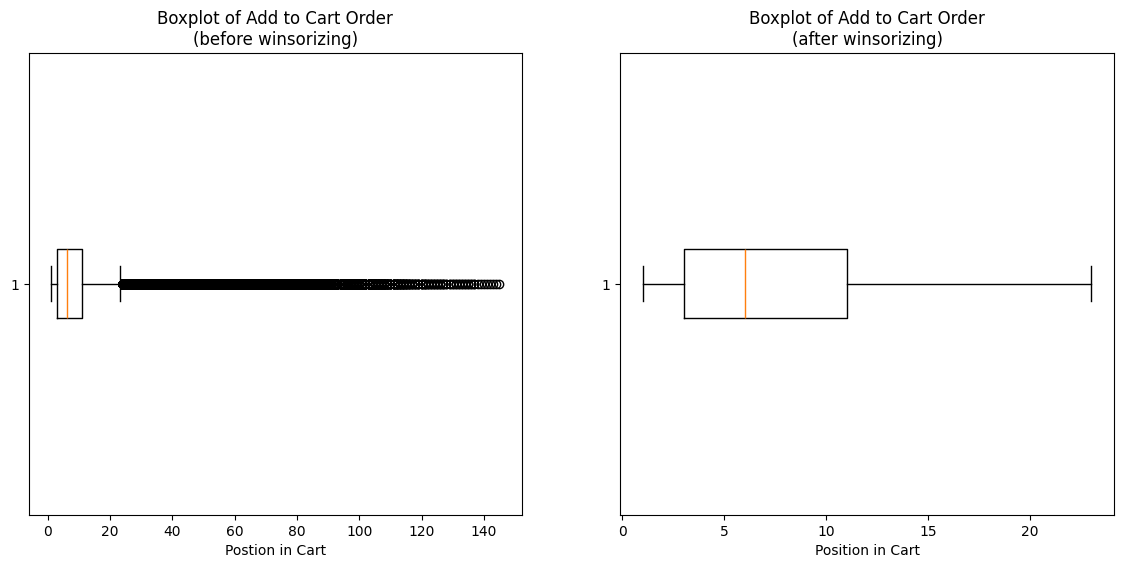

In [18]:
fig,axes=plt.subplots(1,2,figsize=(14,6))
axes[0].boxplot(full_priors['add_to_cart_order'],vert=False)
axes[0].set_title("Boxplot of Add to Cart Order\n(before winsorizing)")
axes[0].set_xlabel("Postion in Cart")

axes[1].boxplot(full_priors['add_to_cart_order_winsor'],vert=False)
axes[1].set_title("Boxplot of Add to Cart Order\n(after winsorizing)")
axes[1].set_xlabel("Position in Cart")

Text(0.5, 0, 'Day')

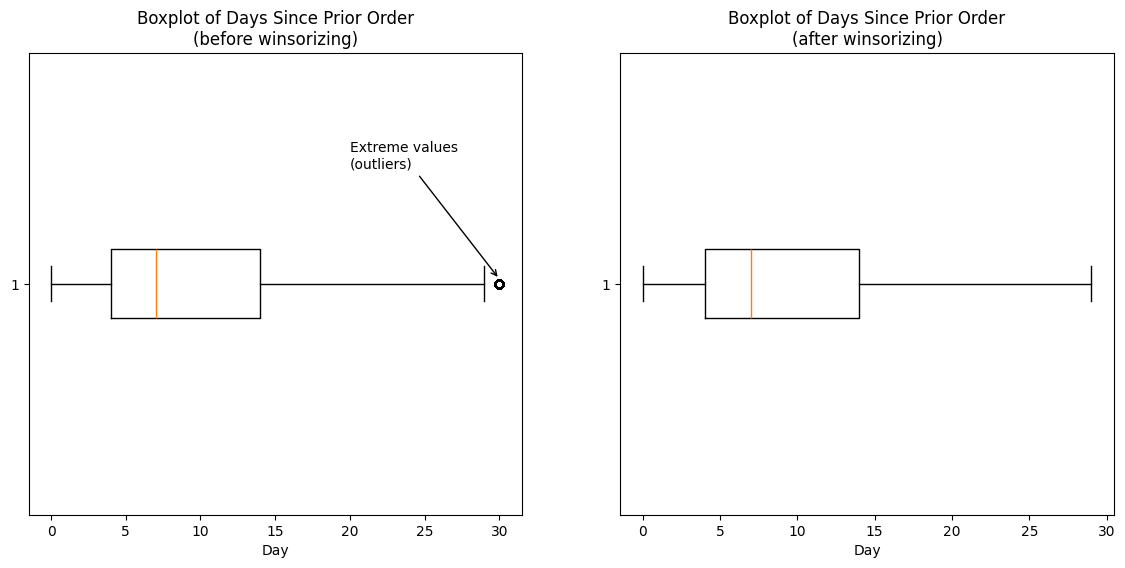

In [19]:
fig,axes=plt.subplots(1,2,figsize=(14,6))
axes[0].boxplot(full_priors['days_since_prior_order'],vert=False)
axes[0].set_title("Boxplot of Days Since Prior Order\n(before winsorizing)")
axes[0].set_xlabel("Day")
axes[0].annotate('Extreme values\n(outliers)',xy=(30, 1.01),          # point near the outlier circles
                 xytext=(20, 1.25),arrowprops=dict(arrowstyle='->',))

axes[1].boxplot(full_priors['days_since_prior_order_winsor'],vert=False)
axes[1].set_title("Boxplot of Days Since Prior Order\n(after winsorizing)")
axes[1].set_xlabel("Day")

## Target Variable Analysis

Reorder rate: 0.59


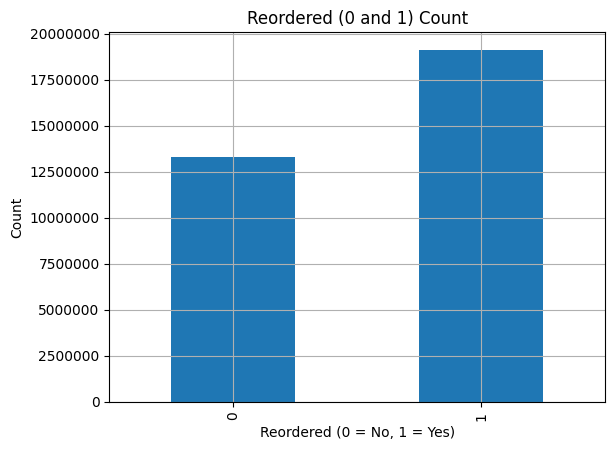

In [20]:
reorder_rate = full_priors['reordered'].mean()
print("Reorder rate:", reorder_rate.round(2))

full_priors['reordered'].value_counts().sort_index().plot(kind='bar',grid=True)
plt.xlabel('Reordered (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Reordered (0 and 1) Count')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Categorical Feature Analysis


In [21]:
categorical_cols = ['order_dow','order_hour_of_day','aisle','department','product_name']
full_priors[categorical_cols].nunique().to_frame(name='unique_values')

,unique_values
order_dow,7
order_hour_of_day,24
aisle,134
department,21
product_name,49677


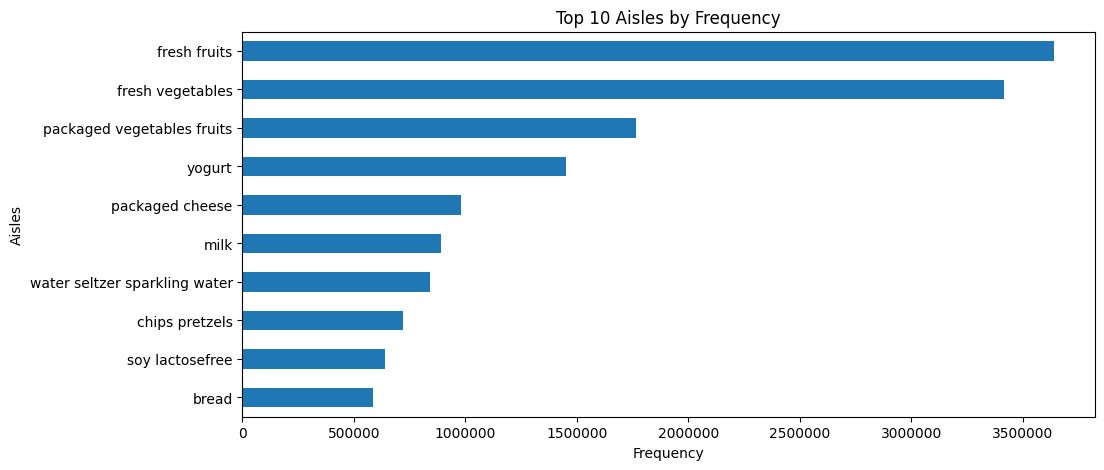

In [22]:
full_priors['aisle'].value_counts().head(10).sort_values().plot(kind='barh',figsize=(11,5))
plt.xlabel('Frequency')
plt.ylabel('Aisles')
plt.title("Top 10 Aisles by Frequency")
plt.ticklabel_format(style='plain',axis='x')

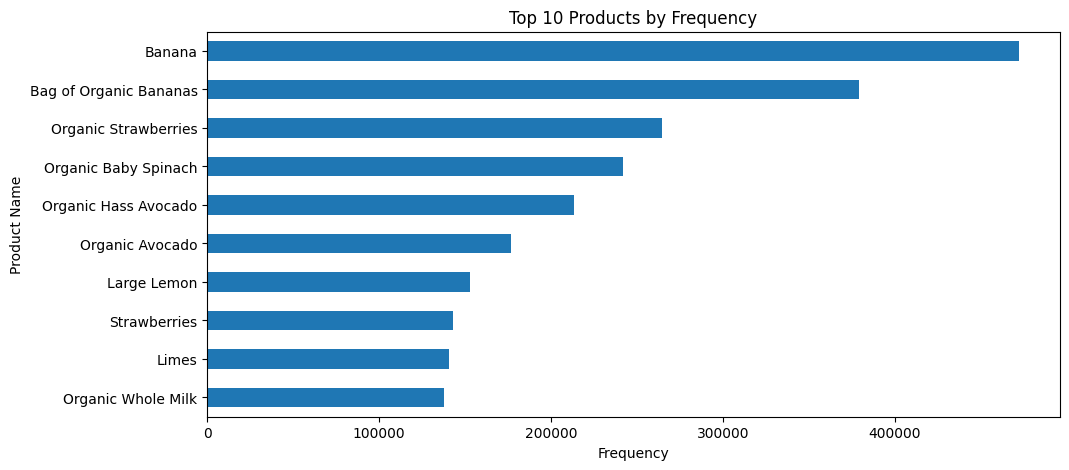

In [23]:
full_priors['product_name'].value_counts().head(10).sort_values().plot(kind='barh',figsize=(11,5))
plt.xlabel('Frequency')
plt.ylabel('Product Name')
plt.title("Top 10 Products by Frequency")
plt.ticklabel_format(style='plain',axis='x')

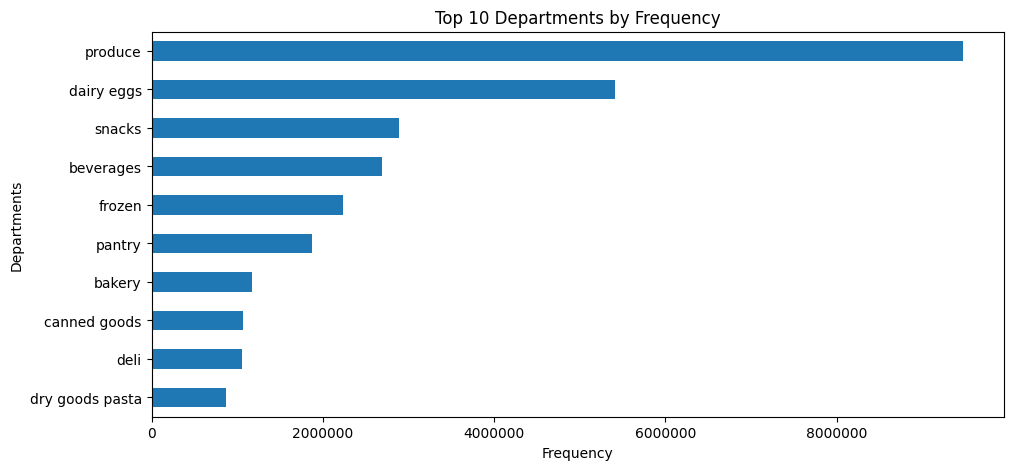

In [24]:
full_priors['department'].value_counts().head(10).sort_values().plot(kind='barh',figsize=(11,5))
plt.xlabel('Frequency')
plt.ylabel('Departments')
plt.title("Top 10 Departments by Frequency")
plt.ticklabel_format(style='plain',axis='x')

### Correlation Analysis
Analyze feature–feature and target–feature correlations to identify relationships among numerical variables.

In [25]:
num_features = ['order_dow','order_hour_of_day','days_since_prior_order','add_to_cart_order','reordered']
corr = full_priors[num_features].corr()
corr

,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
order_dow,1.000000,0.012176,-0.026520,-0.009071,-0.006949
order_hour_of_day,0.012176,1.000000,-0.000195,-0.014805,-0.023300
days_since_prior_order,-0.026520,-0.000195,1.000000,0.050260,-0.024465
add_to_cart_order,-0.009071,-0.014805,0.050260,1.000000,-0.133024
reordered,-0.006949,-0.023300,-0.024465,-0.133024,1.000000


<Axes: title={'center': 'Correlation Heatmap of Numeric Features\n (Feature - Feature)'}>

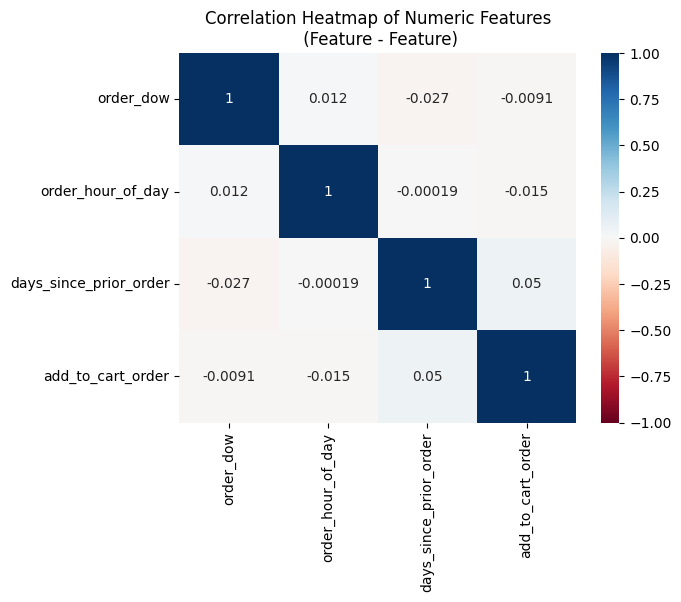

In [26]:
plt.title("Correlation Heatmap of Numeric Features\n (Feature - Feature)")
sns.heatmap(corr.drop(index='reordered', columns='reordered'),cmap='RdBu',vmin=-1,vmax=1,annot=True)

<Axes: title={'center': 'Correlation Heatmap of Target\n (Target - Feature)'}>

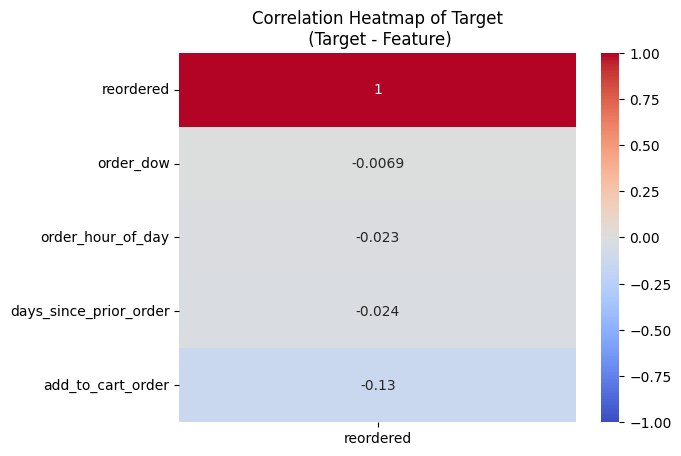

In [27]:
target_corr=corr[['reordered']].sort_values(by='reordered',ascending=False)
plt.title("Correlation Heatmap of Target\n (Target - Feature)")
sns.heatmap(target_corr,cmap='coolwarm',vmax=1,vmin=-1,annot=True)

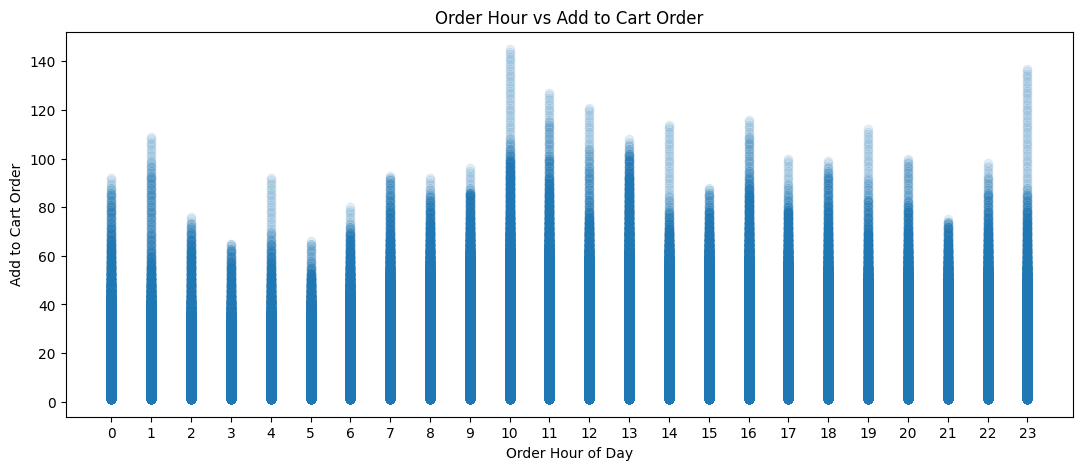

In [28]:
plt.figure(figsize=(13, 5))
plt.scatter(full_priors['order_hour_of_day'],full_priors['add_to_cart_order'],alpha=0.1)
plt.xlabel('Order Hour of Day')
plt.ylabel('Add to Cart Order')
plt.title('Order Hour vs Add to Cart Order')
plt.xticks(range(0,24))
plt.show()


### Pairwise Feature Relationships
We selected one target and two behaviorally important numeric features to keep the pairwise visualization interpretable


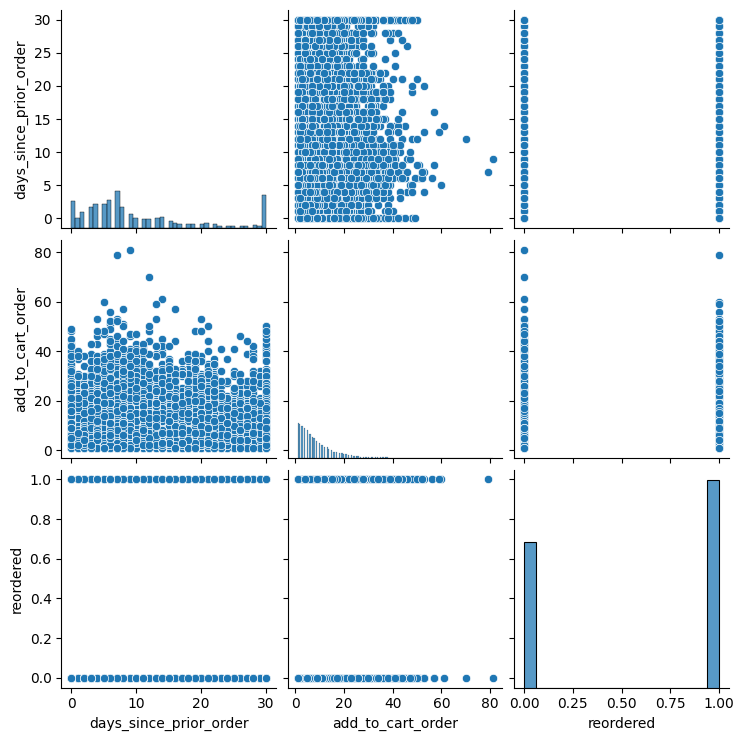

In [29]:
sns.pairplot(full_priors.sample(25000, random_state=42)[['days_since_prior_order', 'add_to_cart_order', 'reordered']])
plt.show()


### Time-of-Day Seasonality
Visualize how order volume varies across hours of the day.
Orders peak in the late morning to the late afternoon, with minimal activity during early morning and late night hours.



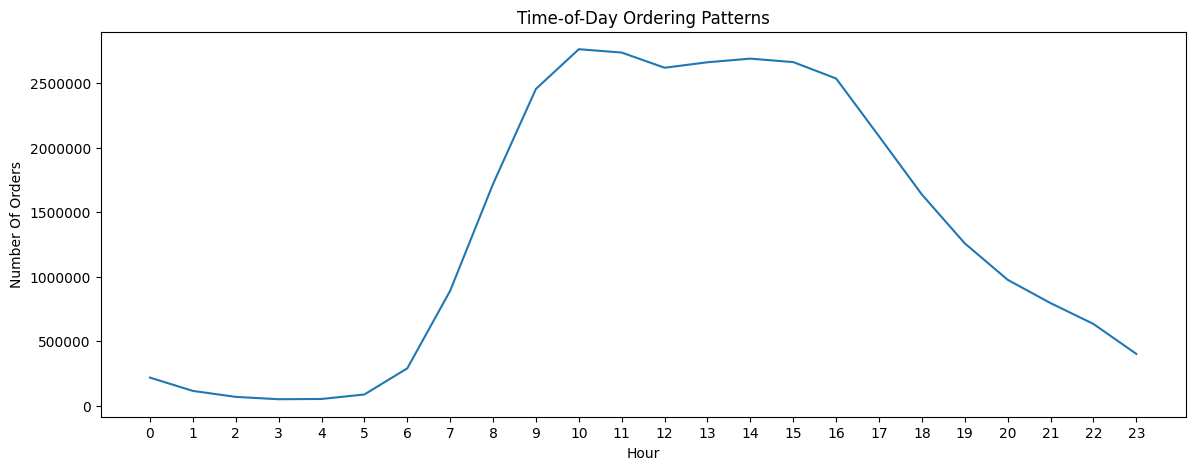

In [30]:
full_priors.groupby('order_hour_of_day').size().plot(kind='line',ylabel='Number Of Orders',xlabel='Hour',figsize=(14,5))
plt.xticks(range(0,24))
plt.title('Time-of-Day Ordering Patterns')
plt.ticklabel_format(style='plain')

### Day-of-Week Seasonality
Ordering activity is highest at the start of the week, with noticeably lower activity during midweek.


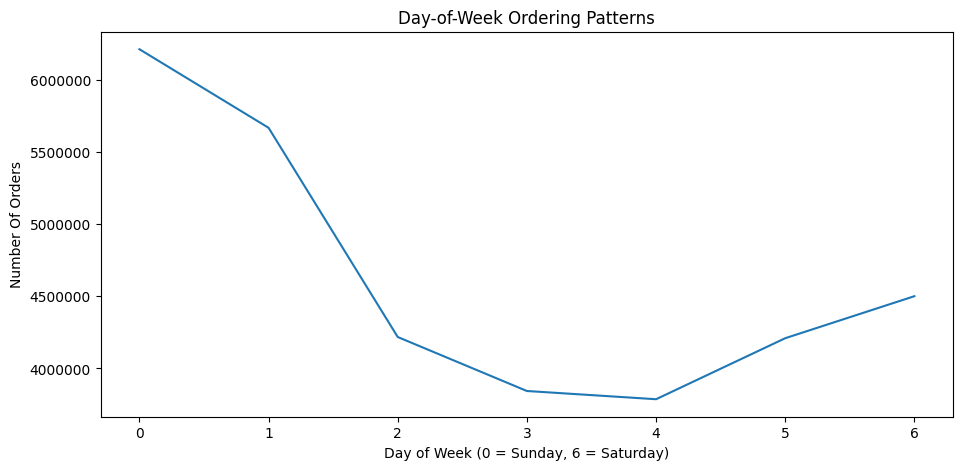

In [31]:
full_priors.groupby('order_dow').size().plot(kind='line',ylabel='Number Of Orders',xlabel='Day of Week (0 = Sunday, 6 = Saturday)',figsize=(11,5))
plt.title('Day-of-Week Ordering Patterns')
plt.ticklabel_format(style='plain')

### Monthly Seasonality
Monthly analysis requires a real calendar date field. Since this dataset does not contain one, we cannot extract meaningful monthly patterns.


## Save Processed Data

In [32]:
full_priors.to_parquet("../data/processed/full_priors.parquet")
full_train.to_parquet("../data/processed/full_train.parquet")